## Datacamp
### Joining Data with Pandas
#### Merging Ordered and Time-Series Data
Kadriye Tuba Türkcan Karaca



- #### Correlation between GDP and S&P500 
- #### Phillips curve using merge_ordered()
- #### merge_ordered() caution, multiple columns
- #### Using merge_asof() to study stocks
- #### Using merge_asof() to create dataset
- #### Subsetting rows with .query()
- #### Select the right .melt() arguments
- #### Using .melt() for stocks vs bond performance

## Correlation between GDP and S&P500
We want to analyze stock returns from the S&P 500. We believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.



In [3]:
import pandas as pd

In [91]:
gdp_usa_dict = {
    'country code' : ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
    'year' : [2010, 2011, 2012, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'gdp' : [14992100000000.0, 15542600000000.0, 16197000000000.0, 16197000000000.0, 16784800000000.0, 17521700000000.0, 18219300000000.0, 18707200000000.0, 19485400000000.0, 20494100000000.0]
}

In [92]:
gdp_usa = pd.DataFrame(gdp_usa_dict)

In [93]:
gdp_usa

,country code,year,gdp
0,USA,2010,1.499210e+13
1,USA,2011,1.554260e+13
2,USA,2012,1.619700e+13
3,USA,2012,1.619700e+13
4,USA,2013,1.678480e+13
5,USA,2014,1.752170e+13
6,USA,2015,1.821930e+13
7,USA,2016,1.870720e+13
8,USA,2017,1.948540e+13
9,USA,2018,2.049410e+13


In [94]:
sp500 = pd.read_csv('S&P500.csv')

In [95]:
sp500

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.

In [97]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp_usa, sp500, left_on='year', right_on='Date', 
                             how='left')
gdp_sp500

,country code,year,gdp,Date,Returns
0,USA,2010,1.499210e+13,2010.0,12.78
1,USA,2011,1.554260e+13,2011.0,0.00
2,USA,2012,1.619700e+13,2012.0,13.41
3,USA,2012,1.619700e+13,2012.0,13.41
4,USA,2013,1.678480e+13,2013.0,29.60
5,USA,2014,1.752170e+13,2014.0,11.39
6,USA,2015,1.821930e+13,2015.0,-0.73
7,USA,2016,1.870720e+13,2016.0,9.54
8,USA,2017,1.948540e+13,2017.0,19.42
9,USA,2018,2.049410e+13,NaN,NaN


Look at the returns for the year 2018.

Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.

In [98]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp_usa,sp500,left_on='year', right_on = 'Date', how = 'left', fill_method = 'ffill' )
gdp_sp500

,country code,year,gdp,Date,Returns
0,USA,2010,1.499210e+13,2010,12.78
1,USA,2011,1.554260e+13,2011,0.00
2,USA,2012,1.619700e+13,2012,13.41
3,USA,2012,1.619700e+13,2012,13.41
4,USA,2013,1.678480e+13,2013,29.60
5,USA,2014,1.752170e+13,2014,11.39
6,USA,2015,1.821930e+13,2015,-0.73
7,USA,2016,1.870720e+13,2016,9.54
8,USA,2017,1.948540e+13,2017,19.42
9,USA,2018,2.049410e+13,2017,19.42


Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.

In [99]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'Returns']]
gdp_returns

,gdp,Returns
0,1.499210e+13,12.78
1,1.554260e+13,0.00
2,1.619700e+13,13.41
3,1.619700e+13,13.41
4,1.678480e+13,29.60
5,1.752170e+13,11.39
6,1.821930e+13,-0.73
7,1.870720e+13,9.54
8,1.948540e+13,19.42
9,2.049410e+13,19.42


Print the correlation matrix of the gdp_returns table.

In [100]:
# Print gdp_returns correlation
print (gdp_returns.corr())

              gdp   Returns
gdp      1.000000  0.212173
Returns  0.212173  1.000000


Awesome!We can see the different aspects of merge_ordered() and how we might use it on data that can be ordered. By using this function, we were able to fill in the missing data from 2019. Finally, the correlation of 0.21 between the GDP and S&P500 is low to moderate at best. We may want to find another predictor if we plan to play in the stock market.

## Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

We will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. We will need to use the entries where we have data within both tables.

In [15]:
unemployment_dict = {
    'date' : ['2013-06-01', '2014-01-01', '2014-06-01', '2015-01-01', '2015-06-01', '2016-01-01', '2016-06-01', '2017-01-01', '2017-06-01', '2018-01-01', '2018-06-01', '2019-01-01', '2019-06-01', '2020-01-01'],
    'unemployment_rate' : [7.5, 6.7, 6.1, 5.6, 5.3, 5.0, 4.9, 4.7, 4.3, 4.1, 4.0, 3.9, 3.7, 3.5]
    
}

In [16]:
unemployment = pd.DataFrame(unemployment_dict)

In [17]:
unemployment

,date,unemployment_rate
0,2013-06-01,7.5
1,2014-01-01,6.7
2,2014-06-01,6.1
3,2015-01-01,5.6
4,2015-06-01,5.3
5,2016-01-01,5.0
6,2016-06-01,4.9
7,2017-01-01,4.7
8,2017-06-01,4.3
9,2018-01-01,4.1


In [18]:
inflation_dict = {
    'date' : ['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
    'cpi' : [235.28799999999998, 235.547, 236.028, 236.468, 236.918, 237.231, 237.498, 237.46, 237.477, 237.43, 236.983, 236.252, 234.718, 235.236, 236.005, 236.15599999999998, 236.97400000000002, 237.68400000000003, 238.053, 238.028, 237.50599999999997, 237.78099999999998, 238.016, 237.817, 237.833, 237.46900000000002, 238.03799999999998, 238.827, 239.46400000000003, 240.167, 240.15, 240.602, 241.051, 241.69099999999997, 242.02900000000002, 242.77200000000002, 243.78, 243.96099999999998, 243.74900000000002, 244.051, 243.96200000000002, 244.18200000000002, 244.39, 245.297, 246.418, 246.58700000000002, 247.332, 247.90099999999998, 248.88400000000001, 249.36900000000003, 249.498, 249.956, 250.646, 251.13400000000001, 251.597, 251.87900000000002, 252.01, 252.794, 252.76, 252.72299999999998],
    'seriesid' : ['CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0'],
    'data_type' : ['SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX']
}

In [19]:
inflation = pd.DataFrame(inflation_dict)

In [21]:
inflation.head()

,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,2014-04-01,236.468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,2014-05-01,236.918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.

In [22]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment,  on = 'date', how = 'inner')
inflation_unemploy

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
5,2016-06-01,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
6,2017-01-01,243.780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.7
7,2017-06-01,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.3
8,2018-01-01,248.884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.1
9,2018-06-01,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.0


Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.



In [24]:
import matplotlib.pyplot as plt

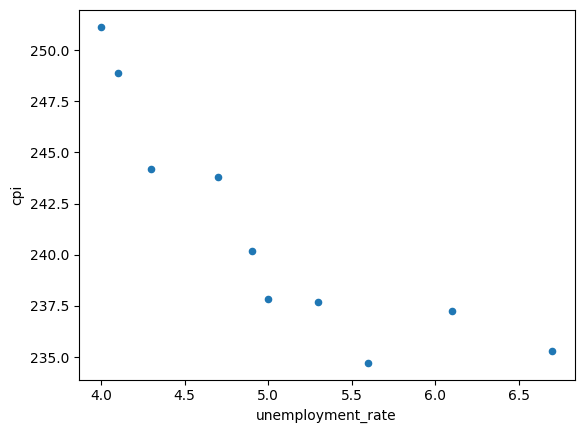

In [25]:
# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind = 'scatter', x = 'unemployment_rate', y = 'cpi')
plt.show()

Great! We created a Phillips curve. There are critics of the curve, but what is more important in this example is that we were able to use entries where we had entries in both tables by using an inner join. You might ask why not use the default outer join and use forward fill to fill to estimate the missing variables. You might choose differently. In this case, instead of showing an estimated unemployment rate (which is a continually changing measure) for five periods, that data was dropped from the plot.

## merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.



In [26]:
pop_dict = {
    'date' : ['1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00', '1993-01-01 00:00:00', '1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00', '1993-01-01 00:00:00'],
    'country' : ['Australia', 'Australia', 'Australia', 'Australia', 'Sweden', 'Sweden', 'Sweden', 'Sweden'],
    'pop' : [17065100, 17284000, 17495000, 17667000, 8558835, 8617375, 8668067, 8718561],
    'series_code' : ['SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL']
}

In [27]:
pop = pd.DataFrame(pop_dict)

In [28]:
pop

,date,country,pop,series_code
0,1990-01-01 00:00:00,Australia,17065100,SP.POP.TOTL
1,1991-01-01 00:00:00,Australia,17284000,SP.POP.TOTL
2,1992-01-01 00:00:00,Australia,17495000,SP.POP.TOTL
3,1993-01-01 00:00:00,Australia,17667000,SP.POP.TOTL
4,1990-01-01 00:00:00,Sweden,8558835,SP.POP.TOTL
5,1991-01-01 00:00:00,Sweden,8617375,SP.POP.TOTL
6,1992-01-01 00:00:00,Sweden,8668067,SP.POP.TOTL
7,1993-01-01 00:00:00,Sweden,8718561,SP.POP.TOTL


In [29]:
gdp

,country code,year,gdp
0,USA,2010,1.499210e+13
1,USA,2011,1.554260e+13
2,USA,2012,1.619700e+13
3,USA,2012,1.619700e+13
4,USA,2013,1.678480e+13
5,USA,2014,1.752170e+13
6,USA,2015,1.821930e+13
7,USA,2016,1.870720e+13
8,USA,2017,1.948540e+13
9,USA,2018,2.049410e+13


In [101]:
gdp_aus_swe_dict = {
    'date' : ['1990-01-01 00:00:00', '1990-04-01 00:00:00', '1990-07-01 00:00:00', '1990-09-01 00:00:00', '1991-01-01 00:00:00', '1991-04-01 00:00:00', '1991-07-01 00:00:00', '1991-09-01 00:00:00', '1992-01-01 00:00:00', '1992-04-01 00:00:00', '1992-07-01 00:00:00', '1992-09-01 00:00:00', '1993-01-01 00:00:00', '1993-04-01 00:00:00', '1993-07-01 00:00:00', '1993-09-01 00:00:00', '1990-01-01 00:00:00', '1990-04-01 00:00:00', '1990-07-01 00:00:00', '1990-09-01 00:00:00', '1991-01-01 00:00:00', '1991-04-01 00:00:00', '1991-07-01 00:00:00', '1991-09-01 00:00:00', '1992-01-01 00:00:00', '1992-04-01 00:00:00', '1992-07-01 00:00:00', '1992-09-01 00:00:00', '1993-01-01 00:00:00', '1993-04-01 00:00:00', '1993-07-01 00:00:00', '1993-09-01 00:00:00'],
    'country' : ['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden'],
    'gdp' : [158051.1324, 158263.5816, 157329.279, 158240.6781, 156195.9535, 155989.0327, 156635.8576, 156744.0566, 157916.0811, 159047.8271, 160658.176, 163960.2207, 165097.4951, 166027.059, 166203.1786, 169279.3479, 79837.84599, 80582.28597000001, 79974.36017, 80106.49738, 79524.24192, 79073.05901, 79084.77036000001, 79740.60625, 79390.92175, 79060.28297999999, 78904.60477, 76996.83684, 75783.58777, 76708.54823, 77662.01816, 77703.30364],
    'series_code' : ['NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD']
    
}

In [102]:
gdp_aus = pd.DataFrame(gdp_aus_swe_dict)

In [103]:
gdp_aus.head()

,date,country,gdp,series_code
0,1990-01-01 00:00:00,Australia,158051.1324,NYGDPMKTPSAKD
1,1990-04-01 00:00:00,Australia,158263.5816,NYGDPMKTPSAKD
2,1990-07-01 00:00:00,Australia,157329.2790,NYGDPMKTPSAKD
3,1990-09-01 00:00:00,Australia,158240.6781,NYGDPMKTPSAKD
4,1991-01-01 00:00:00,Australia,156195.9535,NYGDPMKTPSAKD


Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.

In [104]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp_aus, pop, on = ['date', 'country'],  
                             fill_method='ffill')
ctry_date

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01 00:00:00,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01 00:00:00,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01 00:00:00,Australia,158263.58160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01 00:00:00,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01 00:00:00,Australia,157329.27900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
5,1990-07-01 00:00:00,Sweden,79974.36017,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
6,1990-09-01 00:00:00,Australia,158240.67810,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
7,1990-09-01 00:00:00,Sweden,80106.49738,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
8,1991-01-01 00:00:00,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
9,1991-01-01 00:00:00,Sweden,79524.24192,NYGDPMKTPSAKD,8617375,SP.POP.TOTL


Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.

In [105]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp_aus, pop, on = ['country', 'date'], fill_method = 'ffill')
date_ctry

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01 00:00:00,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01 00:00:00,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01 00:00:00,Australia,157329.27900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01 00:00:00,Australia,158240.67810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01 00:00:00,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
5,1991-04-01 00:00:00,Australia,155989.03270,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
6,1991-07-01 00:00:00,Australia,156635.85760,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
7,1991-09-01 00:00:00,Australia,156744.05660,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
8,1992-01-01 00:00:00,Australia,157916.08110,NYGDPMKTPSAKD,17495000,SP.POP.TOTL
9,1992-04-01 00:00:00,Australia,159047.82710,NYGDPMKTPSAKD,17495000,SP.POP.TOTL


When we merge on date first, the table is sorted by date then country. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and the Sweden for the remainder of the year. This is not what we want. The fill forward is using unintended data to fill in the missing values. However, when we merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

## Using merge_asof() to study stocks
We have a feed of stock market prices that we record. We attempt to track the price every five minutes. Still, due to some network latency, the prices we record are roughly every 5 minutes. We pull our price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). We want to know how the price change of the two other banks compare to JP Morgan. Therefore, we will need to merge these three logs into one table. Afterward, we will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so we can review our analysis.

In [36]:
jpm_dict = {
    'date_time' : ['2017-11-17 15:35:17', '2017-11-17 15:40:04', '2017-11-17 15:45:01', '2017-11-17 15:50:55', '2017-11-17 15:55:00', '2017-11-17 16:00:30', '2017-11-17 16:05:07', '2017-11-17 16:10:08', '2017-11-17 16:15:11', '2017-11-17 16:20:29', '2017-11-17 16:25:25', '2017-11-17 16:30:53', '2017-11-17 16:35:11', '2017-11-17 16:40:44', '2017-11-17 16:45:52', '2017-11-17 16:50:37', '2017-11-17 16:55:02'],
    'close' : [98.12, 98.18, 97.7307, 97.74, 97.815, 98.02, 97.8, 97.84, 97.71, 97.76, 97.82, 97.95, 97.99, 98.06, 98.05, 98.1101, 98.18]
}

In [37]:
jpm = pd.DataFrame(jpm_dict)

In [46]:
jpm["date_time"] = pd.to_datetime(jpm["date_time"])

In [47]:
jpm

,date_time,close
0,2017-11-17 15:35:17,98.1200
1,2017-11-17 15:40:04,98.1800
2,2017-11-17 15:45:01,97.7307
3,2017-11-17 15:50:55,97.7400
4,2017-11-17 15:55:00,97.8150
5,2017-11-17 16:00:30,98.0200
6,2017-11-17 16:05:07,97.8000
7,2017-11-17 16:10:08,97.8400
8,2017-11-17 16:15:11,97.7100
9,2017-11-17 16:20:29,97.7600


In [39]:
wells_dict = {
    'date_time' : ['2017-11-17 15:35:08', '2017-11-17 15:40:00', '2017-11-17 15:45:32', '2017-11-17 15:50:07', '2017-11-17 15:55:00', '2017-11-17 16:00:30', '2017-11-17 16:05:52', '2017-11-17 16:10:22', '2017-11-17 16:15:43', '2017-11-17 16:20:07', '2017-11-17 16:25:13', '2017-11-17 16:30:04', '2017-11-17 16:35:32', '2017-11-17 16:40:09', '2017-11-17 16:45:24', '2017-11-17 16:50:28', '2017-11-17 16:55:42'],
    'close': [54.3227, 54.32, 54.19, 54.17, 54.1841, 54.265, 54.2, 54.155, 54.19, 54.205, 54.23, 54.22, 54.22, 54.28, 54.24, 54.17, 54.18]
}

In [40]:
wells = pd.DataFrame(wells_dict)

In [48]:
wells["date_time"] = pd.to_datetime(wells["date_time"])

In [49]:
wells

,date_time,close
0,2017-11-17 15:35:08,54.3227
1,2017-11-17 15:40:00,54.3200
2,2017-11-17 15:45:32,54.1900
3,2017-11-17 15:50:07,54.1700
4,2017-11-17 15:55:00,54.1841
5,2017-11-17 16:00:30,54.2650
6,2017-11-17 16:05:52,54.2000
7,2017-11-17 16:10:22,54.1550
8,2017-11-17 16:15:43,54.1900
9,2017-11-17 16:20:07,54.2050


In [42]:
bac_dict = {
    'date_time' : ['2017-11-17 15:35:17', '2017-11-17 15:40:06', '2017-11-17 15:45:05', '2017-11-17 15:50:34', '2017-11-17 15:55:06', '2017-11-17 16:00:18', '2017-11-17 16:05:20', '2017-11-17 16:10:05', '2017-11-17 16:15:07', '2017-11-17 16:20:29', '2017-11-17 16:25:00', '2017-11-17 16:30:18', '2017-11-17 16:35:08', '2017-11-17 16:40:46', '2017-11-17 16:45:55', '2017-11-17 16:50:05', '2017-11-17 16:55:02'],
    'close' : [26.552, 26.552, 26.388, 26.378, 26.383000000000003, 26.451999999999998, 26.373, 26.388, 26.369, 26.388, 26.467, 26.482, 26.491999999999997, 26.526999999999997, 26.522, 26.546999999999997, 26.566999999999997]
}

In [43]:
bac = pd.DataFrame(bac_dict)

In [50]:
bac["date_time"] = pd.to_datetime(bac["date_time"])

In [51]:
bac

,date_time,close
0,2017-11-17 15:35:17,26.552
1,2017-11-17 15:40:06,26.552
2,2017-11-17 15:45:05,26.388
3,2017-11-17 15:50:34,26.378
4,2017-11-17 15:55:06,26.383
5,2017-11-17 16:00:18,26.452
6,2017-11-17 16:05:20,26.373
7,2017-11-17 16:10:05,26.388
8,2017-11-17 16:15:07,26.369
9,2017-11-17 16:20:29,26.388


Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.

In [75]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on = 'date_time', suffixes=('', '_wells'),direction = 'nearest')
jpm_wells

,date_time,close,close_wells
0,2017-11-17 15:35:17,98.1200,54.3227
1,2017-11-17 15:40:04,98.1800,54.3200
2,2017-11-17 15:45:01,97.7307,54.1900
3,2017-11-17 15:50:55,97.7400,54.1700
4,2017-11-17 15:55:00,97.8150,54.1841
5,2017-11-17 16:00:30,98.0200,54.2650
6,2017-11-17 16:05:07,97.8000,54.2000
7,2017-11-17 16:10:08,97.8400,54.1550
8,2017-11-17 16:15:11,97.7100,54.1900
9,2017-11-17 16:20:29,97.7600,54.2050


Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.

In [77]:
# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on = 'date_time', suffixes=('_jpm', '_bac'), direction = 'nearest')
jpm_wells_bac

,date_time,close_jpm,close_wells,close_bac
0,2017-11-17 15:35:17,98.1200,54.3227,26.552
1,2017-11-17 15:40:04,98.1800,54.3200,26.552
2,2017-11-17 15:45:01,97.7307,54.1900,26.388
3,2017-11-17 15:50:55,97.7400,54.1700,26.378
4,2017-11-17 15:55:00,97.8150,54.1841,26.383
5,2017-11-17 16:00:30,98.0200,54.2650,26.452
6,2017-11-17 16:05:07,97.8000,54.2000,26.373
7,2017-11-17 16:10:08,97.8400,54.1550,26.388
8,2017-11-17 16:15:11,97.7100,54.1900,26.369
9,2017-11-17 16:20:29,97.7600,54.2050,26.388


Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only.

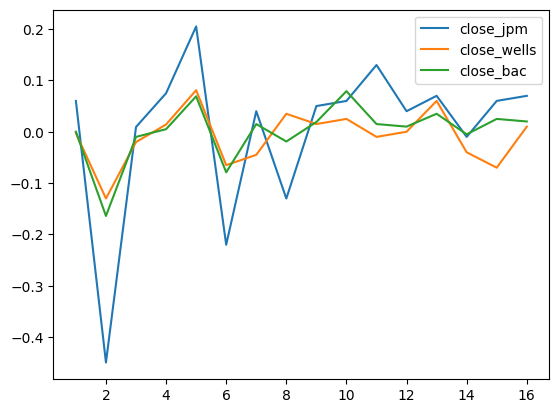

In [78]:
# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

Fabulous! We can see that during this period, the price change for these bank stocks was roughly the same, although the price change for JP Morgan was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy matching between the timestamps of all the tables.

## Using merge_asof() to create dataset
The merge_asof() function can be used to create datasets where we have a table of start and stop dates, and we want to use them to create a flag in another table. We have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to us. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check our work, plot the data in a bar chart.

In [55]:
gdp

,date,country,gdp,series_code
0,1990-01-01 00:00:00,Australia,158051.13240,NYGDPMKTPSAKD
1,1990-04-01 00:00:00,Australia,158263.58160,NYGDPMKTPSAKD
2,1990-07-01 00:00:00,Australia,157329.27900,NYGDPMKTPSAKD
3,1990-09-01 00:00:00,Australia,158240.67810,NYGDPMKTPSAKD
4,1991-01-01 00:00:00,Australia,156195.95350,NYGDPMKTPSAKD
5,1991-04-01 00:00:00,Australia,155989.03270,NYGDPMKTPSAKD
6,1991-07-01 00:00:00,Australia,156635.85760,NYGDPMKTPSAKD
7,1991-09-01 00:00:00,Australia,156744.05660,NYGDPMKTPSAKD
8,1992-01-01 00:00:00,Australia,157916.08110,NYGDPMKTPSAKD
9,1992-04-01 00:00:00,Australia,159047.82710,NYGDPMKTPSAKD


In [58]:
gdp_dict = {
    'date' : ['1979-01-01 00:00:00', '1979-04-01 00:00:00', '1979-07-01 00:00:00', '1979-10-01 00:00:00', '1980-01-01 00:00:00', '1980-04-01 00:00:00', '1980-07-01 00:00:00', '1980-10-01 00:00:00', '1981-01-01 00:00:00', '1981-04-01 00:00:00', '1981-07-01 00:00:00', '1981-10-01 00:00:00', '1982-01-01 00:00:00', '1982-04-01 00:00:00', '1982-07-01 00:00:00', '1982-10-01 00:00:00', '1983-01-01 00:00:00', '1983-04-01 00:00:00', '1983-07-01 00:00:00', '1983-10-01 00:00:00', '1984-01-01 00:00:00', '1984-04-01 00:00:00', '1984-07-01 00:00:00', '1984-10-01 00:00:00'],
    'gdp' : [2526.61, 2591.2470000000003, 2667.565, 2723.883, 2789.842, 2797.3520000000003, 2856.4829999999997, 2985.5570000000002, 3124.2059999999997, 3162.532, 3260.6090000000004, 3280.8179999999998, 3274.302, 3331.972, 3366.322, 3402.5609999999997, 3473.413, 3578.848, 3689.179, 3794.7059999999997, 3908.054, 4009.6009999999997, 4084.25, 4148.5509999999995]
}

In [59]:
gdp = pd.DataFrame(gdp_dict)

In [60]:
gdp

,date,gdp
0,1979-01-01 00:00:00,2526.610
1,1979-04-01 00:00:00,2591.247
2,1979-07-01 00:00:00,2667.565
3,1979-10-01 00:00:00,2723.883
4,1980-01-01 00:00:00,2789.842
5,1980-04-01 00:00:00,2797.352
6,1980-07-01 00:00:00,2856.483
7,1980-10-01 00:00:00,2985.557
8,1981-01-01 00:00:00,3124.206
9,1981-04-01 00:00:00,3162.532


In [61]:
gdp["date"] = pd.to_datetime(gdp["date"])

In [62]:
gdp

,date,gdp
0,1979-01-01,2526.610
1,1979-04-01,2591.247
2,1979-07-01,2667.565
3,1979-10-01,2723.883
4,1980-01-01,2789.842
5,1980-04-01,2797.352
6,1980-07-01,2856.483
7,1980-10-01,2985.557
8,1981-01-01,3124.206
9,1981-04-01,3162.532


In [63]:
recession_dict = {
    'date' : ['1980-01-01 00:00:00', '1980-08-01 00:00:00', '1981-07-01 00:00:00', '1982-12-01 00:00:00', '1990-07-01 00:00:00', '1991-04-01 00:00:00', '2001-03-01 00:00:00', '2001-12-01 00:00:00', '2007-12-01 00:00:00', '2009-07-01 00:00:00'],
    'econ_status' : ['recession', 'normal', 'recession', 'normal', 'recession', 'normal', 'recession', 'normal', 'recession', 'normal']
}

In [64]:
recession = pd.DataFrame(recession_dict)

In [65]:
recession

,date,econ_status
0,1980-01-01 00:00:00,recession
1,1980-08-01 00:00:00,normal
2,1981-07-01 00:00:00,recession
3,1982-12-01 00:00:00,normal
4,1990-07-01 00:00:00,recession
5,1991-04-01 00:00:00,normal
6,2001-03-01 00:00:00,recession
7,2001-12-01 00:00:00,normal
8,2007-12-01 00:00:00,recession
9,2009-07-01 00:00:00,normal


In [66]:
recession["date"] = pd.to_datetime(recession["date"])

Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.

In [71]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on = 'date')
gdp_recession

,date,gdp,econ_status
0,1979-01-01,2526.610,NaN
1,1979-04-01,2591.247,NaN
2,1979-07-01,2667.565,NaN
3,1979-10-01,2723.883,NaN
4,1980-01-01,2789.842,recession
5,1980-04-01,2797.352,recession
6,1980-07-01,2856.483,recession
7,1980-10-01,2985.557,normal
8,1981-01-01,3124.206,normal
9,1981-04-01,3162.532,normal


Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.

In [72]:
# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]
#is_recession

Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

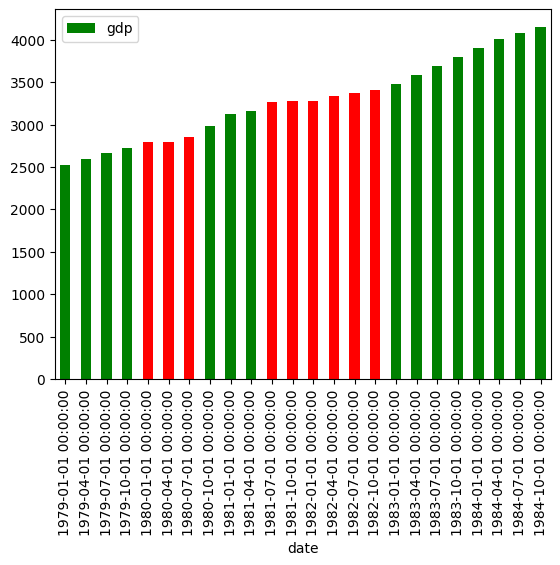

In [73]:
# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

Terrific! We can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. merge_asof() allowed us to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If we were to perform the same task using subsetting, it would have taken a lot more code.

## Subsetting rows with .query()
Now, we will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. We'll merge the two tables and compute the GDP per capita. Afterwards, we'll use the .query() method to sub-select the rows and create a plot. We will need to merge on multiple columns in the proper order.

In [106]:
gdp_aus

,date,country,gdp,series_code
0,1990-01-01 00:00:00,Australia,158051.13240,NYGDPMKTPSAKD
1,1990-04-01 00:00:00,Australia,158263.58160,NYGDPMKTPSAKD
2,1990-07-01 00:00:00,Australia,157329.27900,NYGDPMKTPSAKD
3,1990-09-01 00:00:00,Australia,158240.67810,NYGDPMKTPSAKD
4,1991-01-01 00:00:00,Australia,156195.95350,NYGDPMKTPSAKD
5,1991-04-01 00:00:00,Australia,155989.03270,NYGDPMKTPSAKD
6,1991-07-01 00:00:00,Australia,156635.85760,NYGDPMKTPSAKD
7,1991-09-01 00:00:00,Australia,156744.05660,NYGDPMKTPSAKD
8,1992-01-01 00:00:00,Australia,157916.08110,NYGDPMKTPSAKD
9,1992-04-01 00:00:00,Australia,159047.82710,NYGDPMKTPSAKD


In [80]:
pop

,date,country,pop,series_code
0,1990-01-01 00:00:00,Australia,17065100,SP.POP.TOTL
1,1991-01-01 00:00:00,Australia,17284000,SP.POP.TOTL
2,1992-01-01 00:00:00,Australia,17495000,SP.POP.TOTL
3,1993-01-01 00:00:00,Australia,17667000,SP.POP.TOTL
4,1990-01-01 00:00:00,Sweden,8558835,SP.POP.TOTL
5,1991-01-01 00:00:00,Sweden,8617375,SP.POP.TOTL
6,1992-01-01 00:00:00,Sweden,8668067,SP.POP.TOTL
7,1993-01-01 00:00:00,Sweden,8718561,SP.POP.TOTL


Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.

In [108]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp_aus,pop,on = ['country', 'date'], fill_method='ffill')

In [110]:
gdp_pop.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01 00:00:00,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01 00:00:00,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01 00:00:00,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01 00:00:00,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01 00:00:00,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL


Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.

In [112]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

In [114]:
gdp_pop.head()

,date,country,gdp,series_code_x,pop,series_code_y,gdp_per_capita
0,1990-01-01 00:00:00,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009262
1,1990-04-01 00:00:00,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009274
2,1990-07-01 00:00:00,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009219
3,1990-09-01 00:00:00,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009273
4,1991-01-01 00:00:00,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL,0.009037


Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.

In [115]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', index='date', columns = 'country')

In [116]:
gdp_pivot

country,Australia,Sweden
date,,
1990-01-01 00:00:00,0.009262,0.009328
1990-04-01 00:00:00,0.009274,0.009415
1990-07-01 00:00:00,0.009219,0.009344
1990-09-01 00:00:00,0.009273,0.009360
1991-01-01 00:00:00,0.009037,0.009228
1991-04-01 00:00:00,0.009025,0.009176
1991-07-01 00:00:00,0.009062,0.009177
1991-09-01 00:00:00,0.009069,0.009253
1992-01-01 00:00:00,0.009026,0.009159


Use .query() to select rows from gdp_pivot where date is greater than equal to "1991-01-01". Save as recent_gdp_pop.



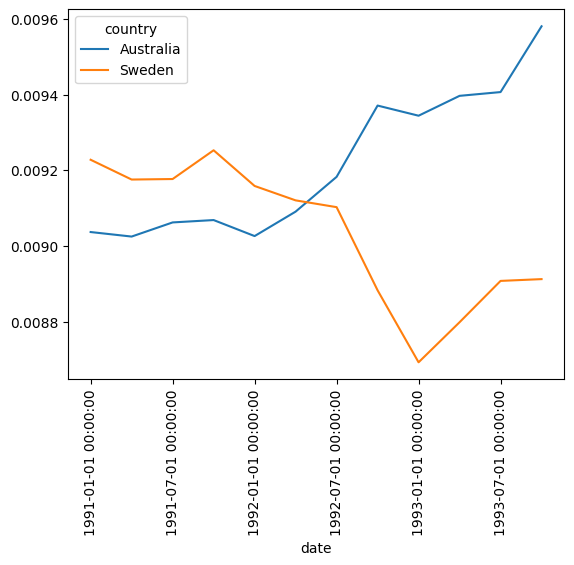

In [118]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date>= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

Amazing! We can see from the plot that the per capita GDP of Australia passed Sweden in 1992. By using the .query() method, we were able to select the appropriate rows easily. The .query() method is easy to read and straightforward.

## Select the right .melt() arguments
We are given a table named inflation. 

In [120]:
inflation_new = pd.DataFrame()

In [121]:
inflation_new ['country'] = ['Brazil', 'Canada', 'France', 'India']
inflation_new['indicator'] = ['Inflation %', 'Inflation %', 'Inflation %', 'Inflation %']
inflation_new['2017'] = [3.45, 1.6, 1.03, 2.49]
inflation_new['2018'] = [3.66, 2.27, 1.85, 4.86]
inflation_new['2019'] = [3.73, 1.95, 1.11, 7.66]



In [122]:
inflation_new

,country,indicator,2017,2018,2019
0,Brazil,Inflation %,3.45,3.66,3.73
1,Canada,Inflation %,1.60,2.27,1.95
2,France,Inflation %,1.03,1.85,1.11
3,India,Inflation %,2.49,4.86,7.66


In [123]:
inflation_new.melt(id_vars = ['country', 'indicator'], var_name = 'year', value_name = 'annual' )

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


Magnificent! We identified the correct values to pass to the id_vars argument. These columns are not unpivoted. Finally, the other arguments set the name for the year and value columns.

## Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, we will reshape a table of US unemployment rate data from the BLS into a form we can plot using .melt(). We will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded in a table called ur_wide. 

In [125]:
import numpy as np

In [127]:
from numpy import nan

In [128]:
ur_wide_dict = {
    'year': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
    'jan': [9.8, 9.1, 8.3, 8.0, 6.6, 5.7, 4.9, 4.7, 4.1, 4.0, 3.6],
    'feb' : [9.8, 9.0, 8.3, 7.7, 6.7, 5.5, 4.9, 4.6, 4.1, 3.8, 3.5],
    'mar' : [9.9, 9.0, 8.2, 7.5, 6.7, 5.4, 5.0, 4.4, 4.0, 3.8, 4.4],
    'apr': [9.9, 9.1, 8.2, 7.6, 6.2, 5.4, 5.0, 4.4, 4.0, 3.6, nan],
    'may': [9.6, 9.0, 8.2, 7.5, 6.3, 5.6, 4.8, 4.4, 3.8, 3.6, nan],
    'jun':[9.4, 9.1, 8.2, 7.5, 6.1, 5.3, 4.9, 4.3, 4.0, 3.7, nan],
    'jul':[9.4, 9.0, 8.2, 7.3, 6.2, 5.2, 4.8, 4.3, 3.8, 3.7, nan],
    'aug':[9.5, 9.0, 8.1, 7.2, 6.1, 5.1, 4.9, 4.4, 3.8, 3.7, nan],
    'sep': [9.5, 9.0, 7.8, 7.2, 5.9, 5.0, 5.0, 4.2, 3.7, 3.5, nan],
    'oct' :[9.4, 8.8, 7.8, 7.2, 5.7, 5.0, 4.9, 4.1, 3.8, 3.6, nan],
    'nov':[9.8, 8.6, 7.7, 6.9, 5.8, 5.1, 4.7, 4.2, 3.7, 3.5, nan],
    'dec':[9.3, 8.5, 7.9, 6.7, 5.6, 5.0, 4.7, 4.1, 3.9, 3.5, nan]
}

In [129]:
ur_wide = pd.DataFrame(ur_wide_dict)

In [130]:
ur_wide

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.

In [131]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars = 'year', var_name = 'month', value_name = 'unempl_rate')
ur_tall

,year,month,unempl_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6
...,...,...,...
127,2016,dec,4.7
128,2017,dec,4.1
129,2018,dec,3.9
130,2019,dec,3.5


Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.


In [132]:
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])
ur_tall

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
1,2011,jan,9.1,2011-01-01
2,2012,jan,8.3,2012-01-01
3,2013,jan,8.0,2013-01-01
4,2014,jan,6.6,2014-01-01
...,...,...,...,...
127,2016,dec,4.7,2016-12-01
128,2017,dec,4.1,2017-12-01
129,2018,dec,3.9,2018-12-01
130,2019,dec,3.5,2019-12-01


Sort ur_tall by date and save as ur_sorted.

In [133]:
# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')
ur_sorted

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
11,2010,feb,9.8,2010-02-01
22,2010,mar,9.9,2010-03-01
33,2010,apr,9.9,2010-04-01
44,2010,may,9.6,2010-05-01
...,...,...,...,...
87,2020,aug,NaN,2020-08-01
98,2020,sep,NaN,2020-09-01
109,2020,oct,NaN,2020-10-01
120,2020,nov,NaN,2020-11-01


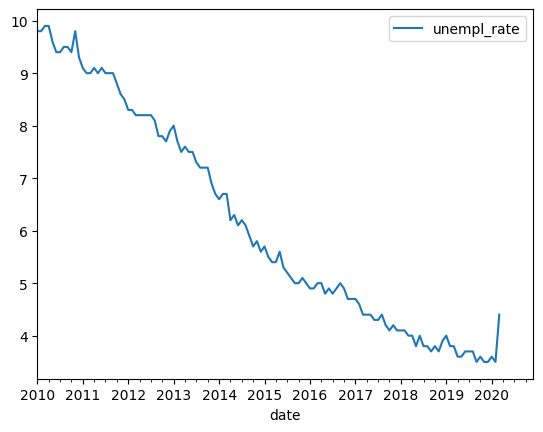

In [134]:
# Plot the unempl_rate by date
ur_sorted.plot(y = 'unempl_rate', x='date')
plt.show()

The plot shows a steady decrease in the unemployment rate with an increase near the end. This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy. In general, data is often provided (especially by governments) in a format that is easily read by people but not by machines. The .melt() method is a handy tool for reshaping data into a useful form.

## Using .melt() for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. We have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. We will need to use the .melt() method to reshape this table.

Additionally, we will use the .query() method to filter out unneeded data. We will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, we will plot data.


In [141]:
from collections import namedtuple

In [147]:
ten_yr = pd.DataFrame(index = [0, 1, 2, 3],columns = ['metric', '2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01', '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01', '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01', '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01'])

In [148]:
ten_yr

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
ten_yr.iloc[0] = ['open', 0.033490769, -0.060448691, 0.025425602000000002, -0.004312204, 0.060632307999999996, 0.02715394, -0.059232757000000004, -0.046270864, 0.014399646, -0.027080148999999998, -0.114702581, 0.022565922999999998, -0.09447061699999999, -0.024644031, -0.021336327999999998, 0.07601835900000001, 0.073047187, -0.020621118, 0.0, -0.024099442000000002, -0.025734338, 0.05042689400000001, -0.267716535, -0.23586541800000002, 0.285973672, 0.045887752000000004, -0.102598718, 0.191049267, 0.10672560800000001, 0.023965762999999998, -0.006687099, -0.046563815, -0.032068255, 0.034346505, -0.050543637999999995]

In [150]:
ten_yr

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.0144,...,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
ten_yr.iloc[1] = ['high', -0.007337954, -0.040657083999999996, 0.022046233, 0.030575916, 0.08026823799999999, -0.021632807, -0.059796193, -0.038445808, 0.003615483, -0.055520237, -0.039488445, -0.053492175, -0.022704837000000002, -0.064646465, 0.049676026, 0.064557613, 0.044696787, -0.034690102, -0.020124581000000002, -0.045232274, 0.052240717, -0.035288391, -0.27169525699999997, -0.01073779, 0.06932773099999999, -0.004256713, 0.04110490000000001, 0.186986734, 0.068121341, -0.061783757, 0.031864047, -0.090324241, 0.012446958999999999, -0.004191115, 0.099326599]

In [152]:
ten_yr.iloc[2] = ['low', -0.016146629, -0.007984032, 0.031075341, -0.0021682570000000003, 0.059104737000000004, -0.027287649, -0.051676861, -0.043371886, 0.002557545, -0.10830241199999999, -0.00130039, -0.145572917, 0.074672356, -0.067498582, 0.043187348, 0.073469388, 0.047256926, -0.022562241, -0.001591934, -0.13632739800000002, 0.046153846, -0.138235294, -0.30443686, 0.059371932999999995, 0.21723019899999998, -0.062404870999999994, 0.068993506, 0.16818527, 0.12317192099999999, -0.055266204000000006, 0.039509954, -0.035945787, -0.050733495999999996, 0.030264005, 0.0071875]

In [153]:
ten_yr.iloc[3] = ['close', -0.05719022, 0.021538462, -0.003872633, 0.056155508, 0.029243354, -0.052056427999999995, -0.049046322, 0.009257218000000001, -0.022712383, -0.112402235, 0.015861027, -0.098141264, -0.028854081, -0.028862479, 0.09527972, 0.076350093, -0.016559565, 0.0, -0.041719025, 0.00367165, 0.037366083, -0.25516372800000003, -0.24112276, 0.267379679, 0.069268636, -0.11706675400000001, 0.163500931, 0.10915493, 0.016738817, -0.006244678, -0.028563268, -0.02763893, 0.025703054, -0.056308962000000004, 0.200562324]

In [155]:
ten_yr

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.0144,...,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544
1,high,-0.007338,-0.040657,0.022046,0.030576,0.080268,-0.021633,-0.059796,-0.038446,0.003615,...,-0.004257,0.041105,0.186987,0.068121,-0.061784,0.031864,-0.090324,0.012447,-0.004191,0.099327
2,low,-0.016147,-0.007984,0.031075,-0.002168,0.059105,-0.027288,-0.051677,-0.043372,0.002558,...,-0.062405,0.068994,0.168185,0.123172,-0.055266,0.03951,-0.035946,-0.050733,0.030264,0.007188
3,close,-0.05719,0.021538,-0.003873,0.056156,0.029243,-0.052056,-0.049046,0.009257,-0.022712,...,-0.117067,0.163501,0.109155,0.016739,-0.006245,-0.028563,-0.027639,0.025703,-0.056309,0.200562


In [156]:
dji = pd.DataFrame()

In [157]:
dji['date'] = ['2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01', '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01', '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01', '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01']

In [158]:
dji['close'] = [0.005094385, -0.02613902, 0.04852522, 0.052007442, -0.016070328000000002, 0.038005504, -0.063894742, 0.066521287, 0.002475632, -0.024041665, -0.01062883, -0.059491712999999995, -0.035595773, 0.013213023, 0.020871591999999998, -0.00143428, -0.042702328, -0.057398135, 0.025433807000000003, -0.069100093, -0.15418084599999998, -0.080309949, 0.058127134000000004, -0.037496447999999995, -0.16479474300000002, 0.042397187999999995, 0.064512765, 0.05677603, 0.038969204, -0.047834178, 0.11097163, 0.05759352, -0.007827874, 0.07739017599999999, -0.003478498, -0.022410836, 0.012850318999999999, 0.050855723, 0.01551093, -0.080054868, -0.035769399, 0.078133736, -0.034476195, 0.067414235, 0.023774684, -0.002383415, 0.039776433, 0.031101532, 0.014329031, -0.0021388789999999998, 0.032418077999999996, 0.001198984, -0.002194236, 0.002626051, -0.06695646, -0.03640589, 0.025681987000000003, 0.001359161, 0.045912125, 0.052597849, 0.017741846000000002, 0.025919756000000002, -0.009181033, -0.053259198, 0.034768257000000004, -0.00014041799999999998, 0.0350163, 0.024247324, -0.018273602, -0.026968932, 0.011859747, 0.028023244, 0.036520977999999996, 0.023491879, 0.037377411, 0.016851552, -0.000224894, 0.025628287000000003, -0.042491667999999996, 0.028118227000000003, 0.007576228000000001, 0.032678999, 0.018379701000000002, 0.015901757, -0.014940513, 0.014771536000000002, 0.007107820999999999, 0.010994522, 0.006544182, -0.993017009, 144.5183012, -0.003245918, 0.020395567, 0.025168869, -0.000286042, -0.03692956, 0.056382432, -0.019666107, 0.014750208, -0.0015301639999999999, -0.021720378999999998, 0.006379318, -0.067894606, -0.025750218, 0.096948254, 0.003193047, -0.016642328, -0.055018607000000004, 0.003048603, 0.070753465, 0.0050042129999999995, 0.000765158, 0.008028289000000001, 0.02800888, -0.001698052, -0.005037860999999999, -0.009055988000000001, 0.054083208, 0.033414211, 0.005135964, 0.047729302, -0.007159263000000001, 0.013420031, 0.0032568090000000003, 0.01622663, 0.025363472999999997, 0.002603798, 0.020821848, 0.04338742599999999, 0.038293773999999996, 0.01840769, 0.057857909000000006, -0.042838503, -0.034663499, 6.208199999999999e-05, 0.010458144, -0.005914219, 0.047125374000000005, 0.021624917, 0.019006501000000002, -0.05074022, 0.016830012, -0.08657517099999999, 0.071683602, 0.036652472, 0.000490015, 0.025616447999999997, -0.066856205, 0.07810595299999999, nan, nan, nan, 0.006778502, nan, nan, nan, -0.010447310999999999, -0.216145511, 0.034803753]

In [159]:
dji

,date,close
0,2007-02-01,0.005094
1,2007-03-01,-0.026139
2,2007-04-01,0.048525
3,2007-05-01,0.052007
4,2007-06-01,-0.016070
...,...,...
154,2019-12-01,NaN
155,2020-01-01,NaN
156,2020-02-01,-0.010447
157,2020-03-01,-0.216146


Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.

In [160]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars = 'metric', var_name='date', value_name = 'close')
bond_perc

,metric,date,close
0,open,2007-02-01,0.033491
1,high,2007-02-01,-0.007338
2,low,2007-02-01,-0.016147
3,close,2007-02-01,-0.05719
4,open,2007-03-01,-0.060449
...,...,...,...
135,close,2009-11-01,-0.056309
136,open,2009-12-01,-0.050544
137,high,2009-12-01,0.099327
138,low,2009-12-01,0.007188


Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.

In [164]:
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric=="close"')
bond_perc_close

,metric,date,close
3,close,2007-02-01,-0.05719
7,close,2007-03-01,0.021538
11,close,2007-04-01,-0.003873
15,close,2007-05-01,0.056156
19,close,2007-06-01,0.029243
23,close,2007-07-01,-0.052056
27,close,2007-08-01,-0.049046
31,close,2007-09-01,0.009257
35,close,2007-10-01,-0.022712
39,close,2007-11-01,-0.112402


Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.


In [166]:
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes = ('_dow', '_bond'))
dow_bond

,date,close_dow,metric,close_bond
0,2007-02-01,0.005094,close,-0.05719
1,2007-03-01,-0.026139,close,0.021538
2,2007-04-01,0.048525,close,-0.003873
3,2007-05-01,0.052007,close,0.056156
4,2007-06-01,-0.016070,close,0.029243
5,2007-07-01,0.038006,close,-0.052056
6,2007-08-01,-0.063895,close,-0.049046
7,2007-09-01,0.066521,close,0.009257
8,2007-10-01,0.002476,close,-0.022712
9,2007-11-01,-0.024042,close,-0.112402


Using dow_bond, plot only the Dow and bond values.

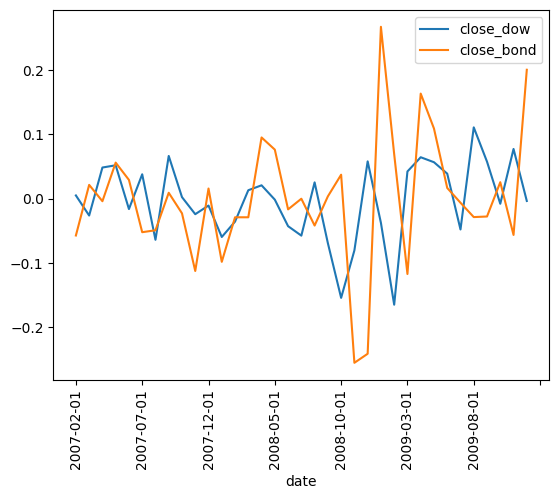

In [167]:
# Plot only the close_dow and close_bond columns
dow_bond.plot(y = ['close_dow','close_bond'], x='date', rot=90)
plt.show()

Super! We used many of the techniques to produce the plot. The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.